# MACHINE LEARNING
# LOGISTIC REGRESSION

## HR ANALYSIS
## PREDICTING WHETHER AN EMPLOYEE LEAVES THE COMPANY OR NOT


In [27]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Samhith\OneDrive\Documents\studies\HR_Analysis_dataset.csv")

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [8]:
df["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [31]:
df["Department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [33]:
df.groupby("left").mean()

C:\Users\Samhith\AppData\Local\Temp\ipykernel_26404\189522867.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("left").mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

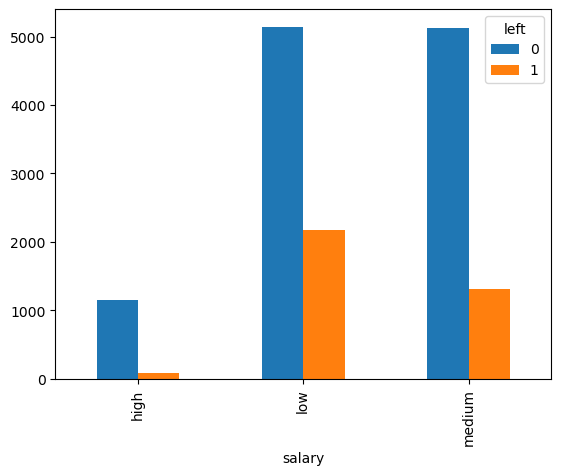

In [36]:
pd.crosstab(df.salary,df.left).plot(kind="bar")

Useful

<Axes: xlabel='Department'>

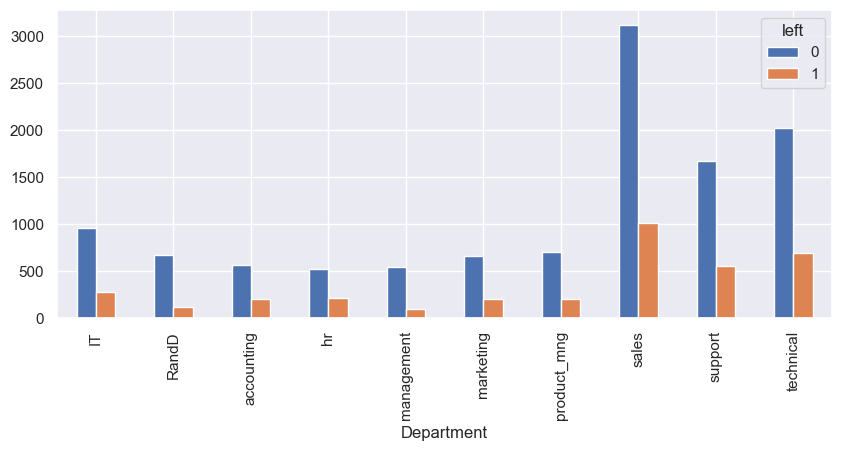

In [52]:
pd.crosstab(df.Department,df.left).plot(kind="bar")

Not really useful so ignore

C:\Users\Samhith\AppData\Local\Temp\ipykernel_26404\4246429992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr(method="pearson")


<Axes: >

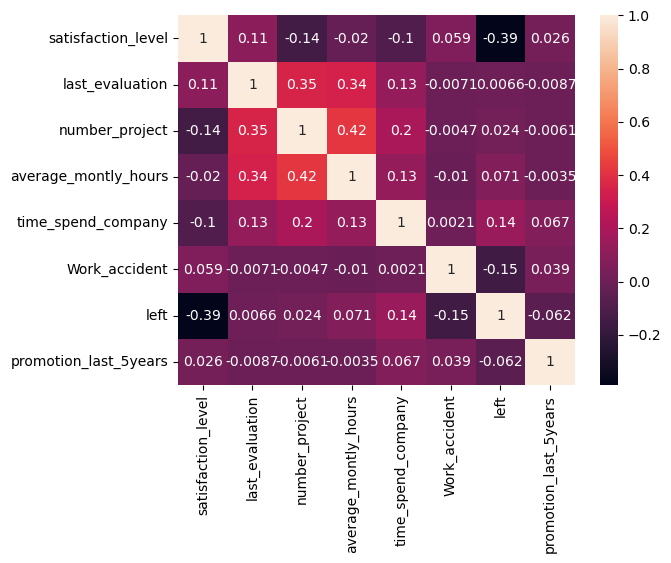

In [22]:
corr_matrix=df.corr(method="pearson") 
sns.heatmap(corr_matrix,annot=True)

## So average_monthly_hours, salary, satisfaction_level are the predictor variables

In [58]:
df=df[["average_montly_hours","satisfaction_level","salary","left"]]
df

,average_montly_hours,satisfaction_level,salary,left
0,157,0.38,low,1
1,262,0.80,medium,1
2,272,0.11,medium,1
3,223,0.72,low,1
4,159,0.37,low,1
...,...,...,...,...
14994,151,0.40,low,1
14995,160,0.37,low,1
14996,143,0.37,low,1
14997,280,0.11,low,1


In [56]:
dummies=pd.get_dummies(df.salary)
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [60]:
merged=pd.concat([df,dummies],axis="columns")
merged

,average_montly_hours,satisfaction_level,salary,left,high,low,medium
0,157,0.38,low,1,0,1,0
1,262,0.80,medium,1,0,0,1
2,272,0.11,medium,1,0,0,1
3,223,0.72,low,1,0,1,0
4,159,0.37,low,1,0,1,0
...,...,...,...,...,...,...,...
14994,151,0.40,low,1,0,1,0
14995,160,0.37,low,1,0,1,0
14996,143,0.37,low,1,0,1,0
14997,280,0.11,low,1,0,1,0


In [65]:
final=merged.drop(["salary","high"],axis="columns")
final

,average_montly_hours,satisfaction_level,left,low,medium
0,157,0.38,1,1,0
1,262,0.80,1,0,1
2,272,0.11,1,0,1
3,223,0.72,1,1,0
4,159,0.37,1,1,0
...,...,...,...,...,...
14994,151,0.40,1,1,0
14995,160,0.37,1,1,0
14996,143,0.37,1,1,0
14997,280,0.11,1,1,0


<Axes: xlabel='average_montly_hours', ylabel='left'>

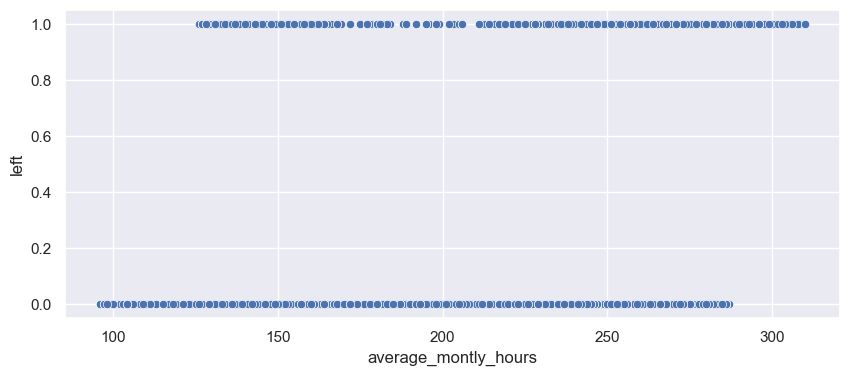

In [68]:
sns.scatterplot(x="average_montly_hours",y="left",data=final)

<Axes: xlabel='satisfaction_level', ylabel='left'>

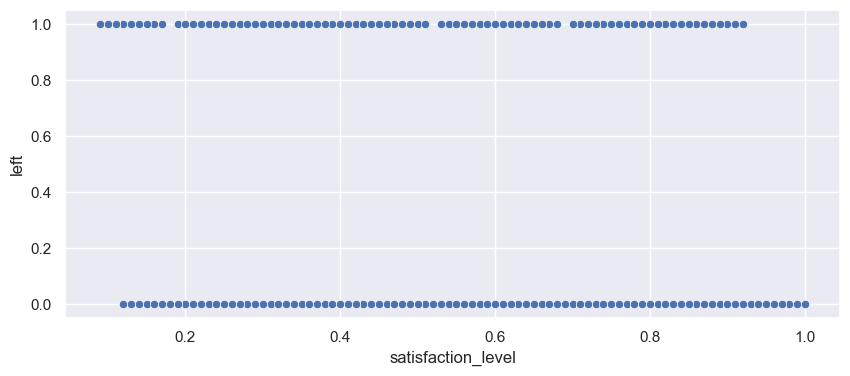

In [69]:
sns.scatterplot(x="satisfaction_level",y="left",data=final)

In [77]:
x=final.drop(["left"],axis="columns")
x

,average_montly_hours,satisfaction_level,low,medium
0,157,0.38,1,0
1,262,0.80,0,1
2,272,0.11,0,1
3,223,0.72,1,0
4,159,0.37,1,0
...,...,...,...,...
14994,151,0.40,1,0
14995,160,0.37,1,0
14996,143,0.37,1,0
14997,280,0.11,1,0


In [78]:
y=final.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [83]:
from sklearn import linear_model
lm=linear_model.LogisticRegression()

In [84]:
lm.fit(x_train,y_train)

LogisticRegression()

In [85]:
lm.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
lm.predict([[203,0.3,1,0]])

C:\Users\Samhith\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [86]:
lm.score(x_test,y_test)

0.7853333333333333

### 78% ACCURATE